**Please change name to something more meaningful than main.ipynb**

This simulation does ... what?

In [1]:
# autoreloading magic
%load_ext autoreload
%autoreload 2

# this adds the parent directory into the path, since we want simulations from the parent directory
import sys; sys.path.insert(0, '..') 

import pandas as pd
import numpy as np
from simulator import Basefee, Simulator, Demand, generate_simulation
from oracle import Oracle
import matplotlib.pyplot as plt

# save into hdf5 file
import os
import h5py
import uuid

NameError: name 'abstractmethod' is not defined

Independent Resource Behavior with randomized solution

**what does this line mean? Please rewrite in a way that the reader gets some content.**

**for the below cell, what should "working" look like? Tell me.**

**generally, try not to end your cell with a giant block of unreadable text; maybe just assign it to an object instead**

In [5]:
# Basic testing code to see if simulator is working

basefee = Basefee(10000,15000,30000)
b = basefee.scaled_copy(0.5)
resource_in = ["call_data","evm"]
ratio = [0.5,0.5]

sim = Simulator(basefee,resource_in,ratio)
demand = Demand(1000,100,51,1000)
sim.simulate(demand)

/home/yan/Projects/camcos/data


({'call_data': [0.0,
   -0.0,
   -0.0,
   0.0,
   -0.0,
   -0.0,
   -0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   -0.0,
   0.0,
   0.0,
   0.0,
   -0.0,
   0.0,
   0.0,
   0.0,
   -0.0,
   -0.0,
   -0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   0.0,
   0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   -0.0,
   0.0],
  'evm': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]},
 {'blocks': [[{'call_data price': 0.0,
     'call_data limit': 6257.186655102864,
     'evm price': 0.0,
     'evm limit

In [ ]:
basefee = Basefee(10000, 15000, 30000)
b = basefee.scaled_copy(0.5)
resource_in = ["call_data", "evm"]
resources = [Resource("call_data","gamma",10,10),Resource("evm","gamma",10,10)]
ratio = [0.5, 0.5]

sim = Simulator(basefee, resources, ratio)
demand = Demand(1000, 100, 51, 1000,resources=resources)
# demand = Demand(1000, 100, 51, 1000)
sim.simulate(demand)

generate_simulation(sim,demand,2,filetype="hdf5+csv")

In [ ]:
# Randomized knapsack solver
bf_standard_value = 38.100002694
bf_standard = Basefee(1.0 / 8, 15000000, 30000000, bf_standard_value)  # d, target gas, max gas
# note our gas maxima are "real-life" amounts, but our actual gas per transaction is about 10x
# bigger, for sake of simplicity
demand = Demand(2000, 300, 400, bf_standard_value)
mbf_sim = Simulator(bf_standard, ("gas", "space"), (0.7, 0.3), resource_behavior="INDEPENDENT",knapsack_solver="random")

generate_simulation(mbf_sim,demand,2,filetype="hdf5+csv")

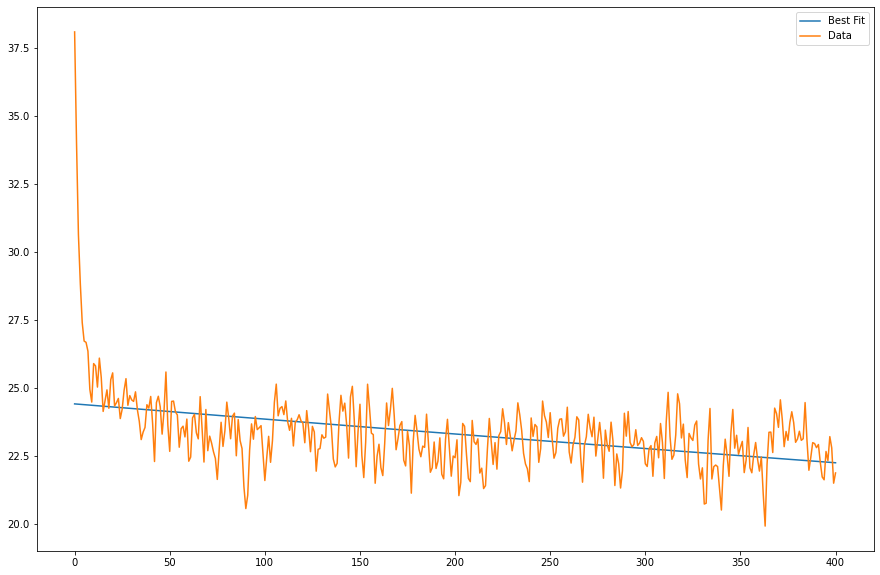

In [55]:
# Model fitting
from lmfit import Model, Parameters, minimize, report_fit
def Exponential(x, A, sigma, c=None):
    if c == None:
        c = 0
    return A * np.exp(-(x / sigma)) + c

x_array = [x for x in range(len(gas_average))]

gmodel = Model(Exponential)
params = Parameters()
params.add('A', value=40, vary=True)
params.add('alpha', value=2, vary=True)
params.add('sigma', value=100, vary=True)
gresult = gmodel.fit(gas_average, params, x=x_array)

# Plot
plt.plot(x_array, gresult.best_fit, '-', label="Best Fit")
plt.plot(x_array, gas_average, label="Data")
plt.legend()
plt.show()

print(gresult.result)

In [2]:
print("Hello")

  # def generate(self):
  #   if self.distribution == "gamma":
  #     if self.proportionLimit is None:
  #       return float(stats.gamma.rvs(self.alpha, scale=1 / self.beta, size=1))
  #     else:
  #       ran = random.uniform(0, 1)
  #       # ran2=random.uniform(0,1) #dont want to make mixture model for call data with 0s
  #       if ran < self.proportionLimit:
  #         return self.lowerLimit
  #       else:
  #         return float(stats.gamma.rvs(self.alpha, scale=1 / self.beta, size=1))

Hello
